# **TEAM-4 PROJECT 1** 

* Aishwary Bodhale
* Himanshu Dubey
* Karishma Ramchandani
* Nandan Adlakha
* Rachel Kallely
* Sahibpreet Singh




### **Interesting Facts and Insights from CT DEEP Spill Incident Tracking System (SITS) Database [July 1996 - present]**

The objective of presenting this notebook is to find out the interesting facts and insights using exploratory data analysis from CT DEEP Spill Incident Tracking System (SITS) Database.

![picture](https://media.nbcconnecticut.com/2020/08/AP_20222584617533.jpg?quality=85&strip=all&resize=850%2C478)

Source: https://media.nbcconnecticut.com/2020/08/AP_20222584617533.jpg?quality=85&strip=all&resize=850%2C478



This data set contains information about discharges of compounds into the environment that have been reported to the Connecticut Department of Energy and Environmental Protection (CT DEEP), primarily to the CT DEEP Dispatch Center. Anyone who causes a discharge, spillage, uncontrolled loss, seepage, or filtration of oil or petroleum or chemical liquids, solid, liquid, or gaseous products, or hazardous wastes that poses a potential threat to human health or the environment must report that release to the CT DEEP under Connecticut General Statutes Section 22a-450. This dataset also includes reports of releases from other people.



**More description about the dataset can be found here:
https://data.ct.gov/Environment-and-Natural-Resources/Spill-Incidents/wr2a-rnsg**

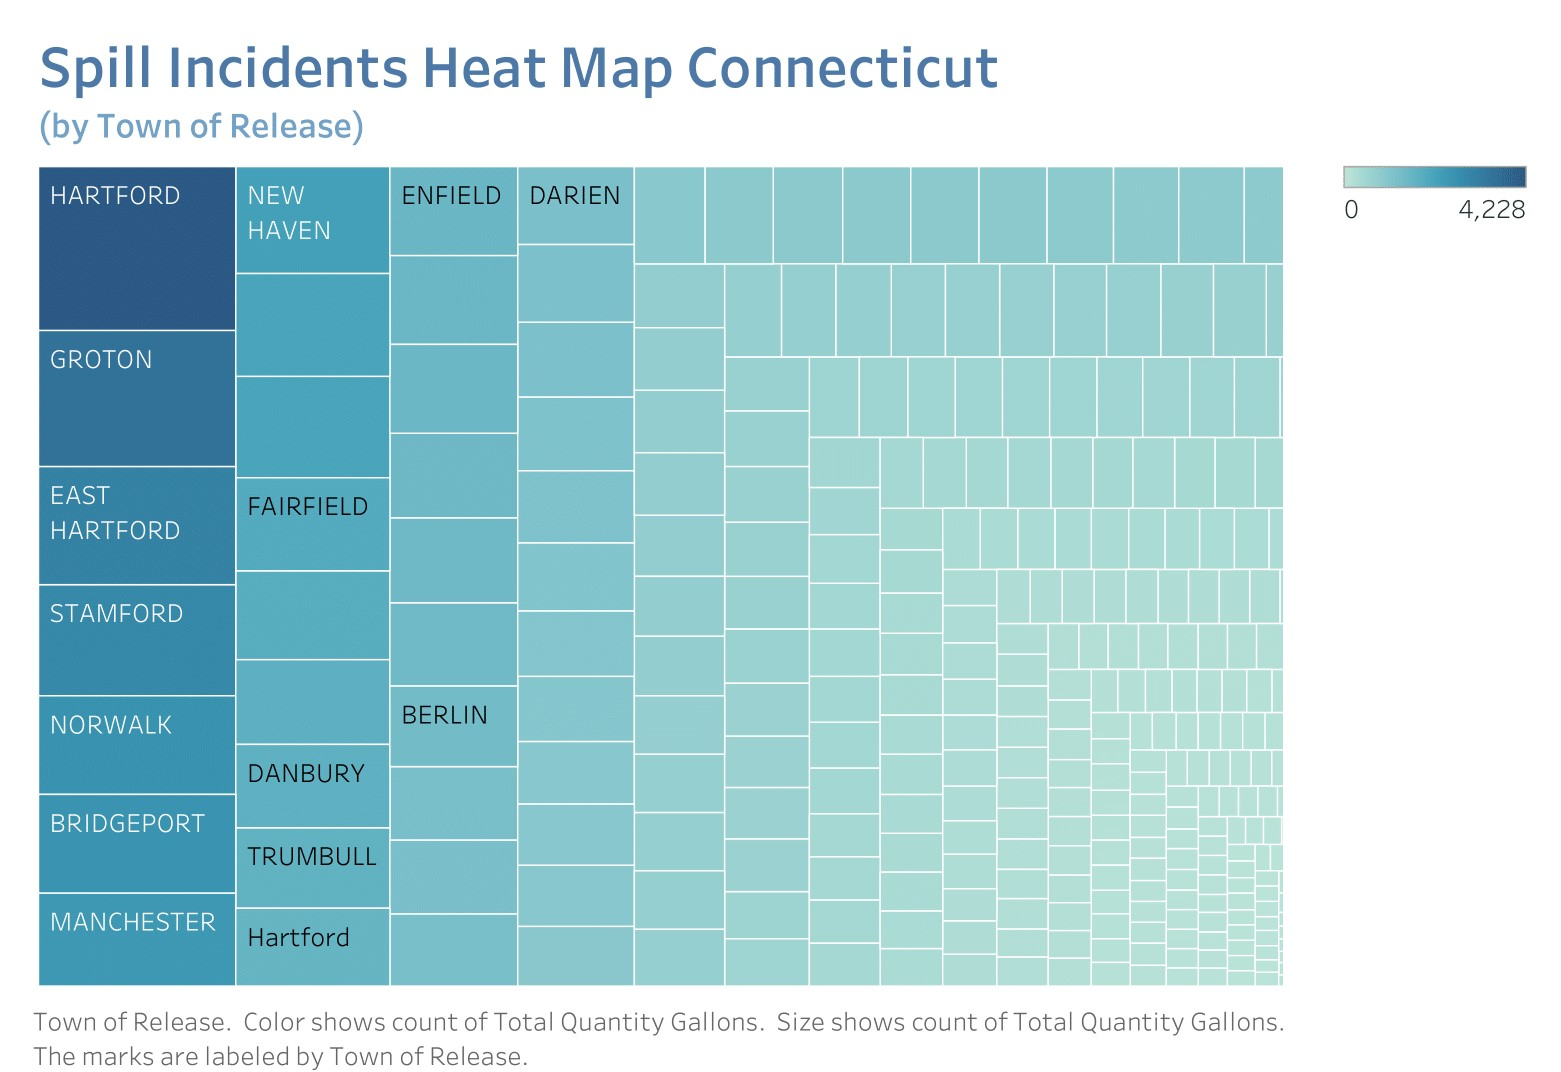

>Build in Tableau

## **Importing Modules**



---

In [ ]:
#importing modules
import pandas as pd 
import numpy as np

# code for ignoring the Warnings
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from pylab import *

## **Data Preparation**



---


### **Importing the Original Dataset**

In [ ]:
# Importing the Original dataset (Spill Incidents)
URL1 = 'https://drive.google.com/file/d/1tmRjtOpwPOJwV3lsmQWZ-ExDYpjnXnoB/view?usp=sharing'

fixed_path = 'https://drive.google.com/uc?export=download&id='

# Step 3: Extract the file ID from the URL (this part of the command is fixed)
file_path = URL1.split('/')[-2]

# Retrieve the CSV data and build a dataframe
df_obj1 = pd.read_csv(fixed_path + file_path)

# Number of lines and columns
print(df_obj1.shape)

# First lines of the dataframe
df_obj1.head()

(193869, 29)


,Year,Case No.,Assigned to,Date Reported Time Reported,Release date and time,Town of Release,State of Release,Reported By,Representing,Responsibile Party/Discharger,Responsible Party Address,Responsible Party Town,Responsible Party State,Responsible Party Zip,Responsible Party Accepts Responsibility (Y/N),Location Of Reported Release,Release Type,Release Substance,Total Quantity Gallons,Total Quantity Yards,Total Quantity Feet,Total Quantity Drums,Total Quantity Pounds,Emergency Measures,Type of Waterbody Affected,Waterbodies Affected,Corrective Actions Taken,Cause Info,Media Info
0,2006,200602190,"THIGPEN, DONNELL",04/18/2006 12:10:00 PM,04/18/2006 12:00:00 AM,MONROE,CT,DISPATCH,FD,MVA,NaN,NaN,CT,NaN,False,RTE 110 NEAR OLD TANNERY RD,petroleum,DIESEL FUEL,20.00,0.00,0.00,0.00,0.00,"DUMP TRUCK FIRE, DIESEL INTO STORM DRAIN",NaN,Catch Basin,NaN,Fire,"Surface Water, and Ground Surface"
1,2002,200208715,NO Response,12/14/2002 01:51:00 PM,12/14/2002 12:00:00 AM,NEW BRITAIN,CT,dispatcher 805,new britain f.d.,NaN,NaN,NaN,CT,NaN,True,alan st/ mcclinitock st,chemical,ANTIFREEZE,2.00,0.00,0.00,0.00,0.00,NaN,none,Other (none),"Sanded, and Cleaned",Other (unknown),Ground Surface
2,2012,201206586,NO Response,11/12/2012 12:07:00 PM,11/12/2012 12:00:00 AM,Easton,CT,Bart Liquigli,Complete Tank LLC,Mrs. Sweeney,NaN,NaN,CT,NaN,True,106 sport hill road,petroleum,#2 FUEL OIL,0.00,0.00,0.00,0.00,0.00,550 UST,NaN,Other (none),Removed Tank,Inground Tank Failure,Other (soil)
3,2002,200207043,NO Response,10/07/2002 08:23:00 AM,10/07/2002 12:00:00 AM,DANBURY,CT,MARJORIE WROGG,"TANKWORKS, INC.",BAYVIEW FINANCIAL,2601 SOUTH BAY SHORE,MIAMI,FL,33133-,True,3 TOWN HILL AVENUE,petroleum,#2 FUEL OIL,0.00,0.00,0.00,0.00,0.00,REMOVAL OF A 550 - GALLON LUST - MINIMAL SOIL ...,NaN,NaN,"Contained, and Contracted, and Removed Tank, a...",Inground Tank Failure,Ground Surface
4,2008,200801170,"SCALORA, RICH",02/28/2008 08:29:00 AM,02/28/2008 08:29:00 AM,NEW LONDON,CT,MIKE MCCARTHY,MCCARTHY OIL,MCCARTHY OIL,50 ROUTE 32,QUAKER HILL,CT,06375,True,330 pequot avenue,petroleum,#2 FUEL OIL,8.00,0.00,0.00,0.00,0.00,SPEEDY DRYED AND HAVE BEEN THERE SEVERAL TIMES...,NaN,NaN,NaN,OVERFILL,"Ground Surface, and Other (BASEMENT)"


### **Understand the data**

Before cleaning data, there are a couple of things we would like to know, for example, the dimension of a dataset, the data type of each variable, the first few rows and name of each variable, etc. For this we will use df_obj1.columns to return all the column name and df.info to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
print(df_obj1.columns)

Index(['Year', 'Case No.', 'Assigned to', 'Date Reported Time Reported',
       'Release date and time', 'Town of Release', 'State of Release',
       'Reported By', 'Representing', 'Responsibile Party/Discharger',
       'Responsible Party Address', 'Responsible Party Town',
       'Responsible Party State', 'Responsible Party Zip',
       'Responsible Party Accepts Responsibility (Y/N)',
       'Location Of Reported Release', 'Release Type', 'Release Substance',
       'Total Quantity Gallons', 'Total Quantity Yards', 'Total Quantity Feet',
       'Total Quantity Drums', 'Total Quantity Pounds', 'Emergency Measures',
       'Type of Waterbody Affected', 'Waterbodies Affected',
       'Corrective Actions Taken', 'Cause Info', 'Media Info'],
      dtype='object')


In [ ]:
df_obj1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193869 entries, 0 to 193868
Data columns (total 29 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   Year                                            193869 non-null  int64 
 1   Case No.                                        193869 non-null  int64 
 2   Assigned to                                     193869 non-null  object
 3   Date Reported Time Reported                     193869 non-null  object
 4   Release date and time                           193180 non-null  object
 5   Town of Release                                 193115 non-null  object
 6   State of Release                                193869 non-null  object
 7   Reported By                                     193655 non-null  object
 8   Representing                                    193149 non-null  object
 9   Responsibile Party/Discharger        

### **Exploring and Cleaning the dataset**



#### **Check Missing Values**

Next, we would like to check if there are any missing values. To check this, we can use the function dataframe.isnull() in pandas. It will return True for missing components and False for non-missing cells. However, when the dimension of a dataset is large, it could be difficult to figure out the existence of missing values. In general, we may just want to know if there are any missing values first. The function dataframe.isnull().sum() returns the number of missing values in the data set. 

In [ ]:
#checking the number of nulls in the external dataset
df_obj1.isnull().sum()

Year                                                   0
Case No.                                               0
Assigned to                                            0
Date Reported Time Reported                            0
Release date and time                                689
Town of Release                                      754
State of Release                                       0
Reported By                                          214
Representing                                         720
Responsibile Party/Discharger                      97417
Responsible Party Address                         158197
Responsible Party Town                            163807
Responsible Party State                               14
Responsible Party Zip                             165574
Responsible Party Accepts Responsibility (Y/N)    121588
Location Of Reported Release                         848
Release Type                                           0
Release Substance              

In [ ]:
# It will return True for missing components and False for non-missing cells.
df_obj1.isna()

,Year,Case No.,Assigned to,Date Reported Time Reported,Release date and time,Town of Release,State of Release,Reported By,Representing,Responsibile Party/Discharger,Responsible Party Address,Responsible Party Town,Responsible Party State,Responsible Party Zip,Responsible Party Accepts Responsibility (Y/N),Location Of Reported Release,Release Type,Release Substance,Total Quantity Gallons,Total Quantity Yards,Total Quantity Feet,Total Quantity Drums,Total Quantity Pounds,Emergency Measures,Type of Waterbody Affected,Waterbodies Affected,Corrective Actions Taken,Cause Info,Media Info
0,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193864,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False
193865,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False
193866,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False
193867,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [ ]:
# To find out the percentage of missing value in each column we use the following function
df_obj1.isnull().sum() * 100/len(df_obj1) 

Year                                               0.000000
Case No.                                           0.000000
Assigned to                                        0.000000
Date Reported Time Reported                        0.000000
Release date and time                              0.355395
Town of Release                                    0.388922
State of Release                                   0.000000
Reported By                                        0.110384
Representing                                       0.371385
Responsibile Party/Discharger                     50.248879
Responsible Party Address                         81.599946
Responsible Party Town                            84.493653
Responsible Party State                            0.007221
Responsible Party Zip                             85.405093
Responsible Party Accepts Responsibility (Y/N)    62.716577
Location Of Reported Release                       0.437409
Release Type                            

#### **Removing Columns with high null values**
If the information contained in the variable is not that high, you can drop the variable if it has more than 20% missing values.In this method we are dropping columns with null values above 20% missing values. We removed these coulmns - 'Responsibile Party/Discharger','Responsible Party Address','Responsible Party Town','Responsible Party Zip','Responsible Party Accepts Responsibility (Y/N)','Emergency Measures','Type of Waterbody Affected','Waterbodies Affected'.

In [ ]:
# Removing Columns with high null values
df_obj1_new = df_obj1.drop(['Responsibile Party/Discharger','Responsible Party Address','Responsible Party Town','Responsible Party Zip','Responsible Party Accepts Responsibility (Y/N)','Emergency Measures','Type of Waterbody Affected','Waterbodies Affected'], axis=1, inplace=False)
df_obj1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193869 entries, 0 to 193868
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Year                          193869 non-null  int64 
 1   Case No.                      193869 non-null  int64 
 2   Assigned to                   193869 non-null  object
 3   Date Reported Time Reported   193869 non-null  object
 4   Release date and time         193180 non-null  object
 5   Town of Release               193115 non-null  object
 6   State of Release              193869 non-null  object
 7   Reported By                   193655 non-null  object
 8   Representing                  193149 non-null  object
 9   Responsible Party State       193855 non-null  object
 10  Location Of Reported Release  193021 non-null  object
 11  Release Type                  193869 non-null  object
 12  Release Substance             192887 non-null  object
 13 

In [ ]:
#checking percentage of null values
df_obj1_new.isnull().sum() * 100/len(df_obj1_new) 

Year                            0.000000
Case No.                        0.000000
Assigned to                     0.000000
Date Reported Time Reported     0.000000
Release date and time           0.355395
Town of Release                 0.388922
State of Release                0.000000
Reported By                     0.110384
Representing                    0.371385
Responsible Party State         0.007221
Location Of Reported Release    0.437409
Release Type                    0.000000
Release Substance               0.506528
Total Quantity Gallons          0.101615
Total Quantity Yards            0.004126
Total Quantity Feet             0.003095
Total Quantity Drums            0.002063
Total Quantity Pounds           0.004126
Corrective Actions Taken        7.741826
Cause Info                      4.027978
Media Info                      0.573067
dtype: float64

In [ ]:
#Checking Null Values
df_obj1_new.isnull().sum() 

Year                                0
Case No.                            0
Assigned to                         0
Date Reported Time Reported         0
Release date and time             689
Town of Release                   754
State of Release                    0
Reported By                       214
Representing                      720
Responsible Party State            14
Location Of Reported Release      848
Release Type                        0
Release Substance                 982
Total Quantity Gallons            197
Total Quantity Yards                8
Total Quantity Feet                 6
Total Quantity Drums                4
Total Quantity Pounds               8
Corrective Actions Taken        15009
Cause Info                       7809
Media Info                       1111
dtype: int64

#### **Remove the missing values from the dataframe**
we use the function dataframe.notnull() function which detects existing/ non-missing values in the dataframe. The function returns a boolean object having the same size as that of the object on which it is applied, indicating whether each individual value is a na value or not. All of the non-missing values gets mapped to true and missing values get mapped to false. Then the missing values are deleted from each row.

In [ ]:
# Removing missing values from the columns

bool_series = pd.notnull(df_obj1_new["Corrective Actions Taken"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Cause Info"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Release date and time"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Representing"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Release date and time"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Total Quantity Yards"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Total Quantity Feet"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Total Quantity Pounds"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Total Quantity Drums"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Total Quantity Yards"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Total Quantity Gallons"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Media Info"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Release Substance"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Responsible Party State"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Location Of Reported Release"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Reported By"])
df_obj1_new = df_obj1_new[bool_series]
bool_series = pd.notnull(df_obj1_new["Town of Release"])
df_obj1_new = df_obj1_new[bool_series]

df_obj1_new.isnull().sum() # To check null values

Year                            0
Case No.                        0
Assigned to                     0
Date Reported Time Reported     0
Release date and time           0
Town of Release                 0
State of Release                0
Reported By                     0
Representing                    0
Responsible Party State         0
Location Of Reported Release    0
Release Type                    0
Release Substance               0
Total Quantity Gallons          0
Total Quantity Yards            0
Total Quantity Feet             0
Total Quantity Drums            0
Total Quantity Pounds           0
Corrective Actions Taken        0
Cause Info                      0
Media Info                      0
dtype: int64

In [ ]:
df_obj1_new.head(5)

,Year,Case No.,Assigned to,Date Reported Time Reported,Release date and time,Town of Release,State of Release,Reported By,Representing,Responsible Party State,Location Of Reported Release,Release Type,Release Substance,Total Quantity Gallons,Total Quantity Yards,Total Quantity Feet,Total Quantity Drums,Total Quantity Pounds,Corrective Actions Taken,Cause Info,Media Info
1,2002,200208715,NO Response,12/14/2002 01:51:00 PM,12/14/2002 12:00:00 AM,NEW BRITAIN,CT,dispatcher 805,new britain f.d.,CT,alan st/ mcclinitock st,chemical,ANTIFREEZE,2.00,0.00,0.00,0.00,0.00,"Sanded, and Cleaned",Other (unknown),Ground Surface
2,2012,201206586,NO Response,11/12/2012 12:07:00 PM,11/12/2012 12:00:00 AM,Easton,CT,Bart Liquigli,Complete Tank LLC,CT,106 sport hill road,petroleum,#2 FUEL OIL,0.00,0.00,0.00,0.00,0.00,Removed Tank,Inground Tank Failure,Other (soil)
3,2002,200207043,NO Response,10/07/2002 08:23:00 AM,10/07/2002 12:00:00 AM,DANBURY,CT,MARJORIE WROGG,"TANKWORKS, INC.",FL,3 TOWN HILL AVENUE,petroleum,#2 FUEL OIL,0.00,0.00,0.00,0.00,0.00,"Contained, and Contracted, and Removed Tank, a...",Inground Tank Failure,Ground Surface
5,2000,200008838,NO Response,11/21/2000 12:54:00 PM,11/21/2000 12:00:00 AM,WEST HARTFORD,CT,TIM LYNCH,TANKWORKS,CT,20 WEST HILL DR,petroleum,#2 FUEL OIL,0.00,0.00,0.00,0.00,0.00,"Removed Tank, and Soil Removed",Inground Tank Failure,Ground Surface
6,2006,200608046,NO Response,12/21/2006 02:51:00 PM,12/21/2006 02:51:00 PM,TRUMBULL,CT,DISPATCHER,TRUMBULL FIRE DEPARTMENT,CT,36 RANDALL DRIVE,petroleum,MOTOR OIL,1.00,0.00,0.00,0.00,0.00,Other (SPEEDY DRYED),MV Accident,Ground Surface


## **Exploratory Data Analysis**

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them.

---

### **Visualizations** 

### **1. Spill incidents per year**

  The plot below shows the number of spill incidents per year. As we can see from the plot year 2001 had the maximum number of spill incidents and gradually declining in the number of spills thereafter. Although, we can see years around 2011 has a bit of spike in spill incidents. In recent years the number of spill incidents had reduced. This plot will help Department of Energy and Environmental Protection (CT DEEP) to study the frequent cause of spill incidents in previous years.

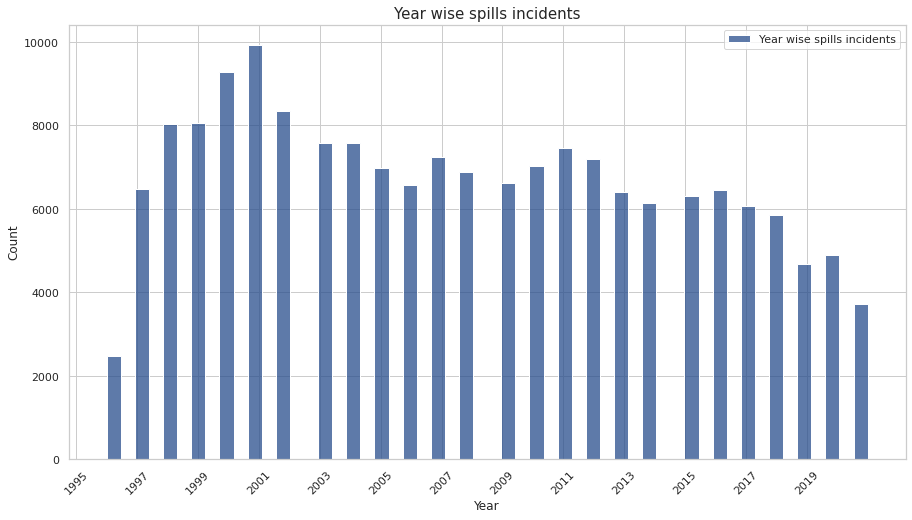

In [ ]:
# we use histogram to show spill incidents per year
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.histplot(data=df_obj1_new, x="Year", color="#284E8C", label="Year wise spills incidents")
plt.xticks(np.arange(1995, 2021, 2))
plt.title('Year wise spills incidents', fontsize=15)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

### **2. Town wise spill incidents**

  The plot below shows town wise spill incidents, where we have sorted the data to top 10 towns (as there were very few spill incidents in the remaining towns). The histogram shows around 5000 spill incidents from Hartford followed by Groton and East Hartford. This plot will help Department of Energy and Environmental Protection (CT DEEP) to find out frequent location of spill incidents.

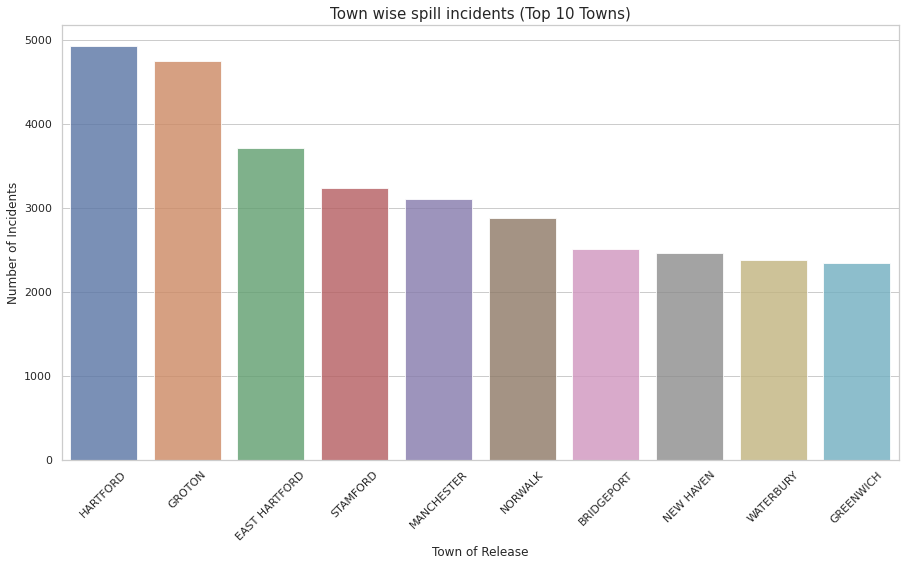

In [ ]:
# we use histogram to show town wise spill incidents
town_count  = df_obj1_new['Town of Release'].value_counts()
town_count = town_count[:10,]
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.barplot(town_count.index, town_count.values, alpha=0.8)
plt.title('Town wise spill incidents (Top 10 Towns)', fontsize=15)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xlabel('Town of Release', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

### **3. Spill cause (top 10) v/s count**

  Below figure shows the cause of spill incidents by count. We have taken the top 10 causes of spill incidents as the remaining counts were low as compared to the data. Around 30% of the causes are because of MV accident which means motor vehicle accidents and inground tank failure which means leaking underground storage tanks. This plot will help the Department of Energy and Environmental Protection (CT DEEP) to take preventive measures against the frequent cause of spill incidents.

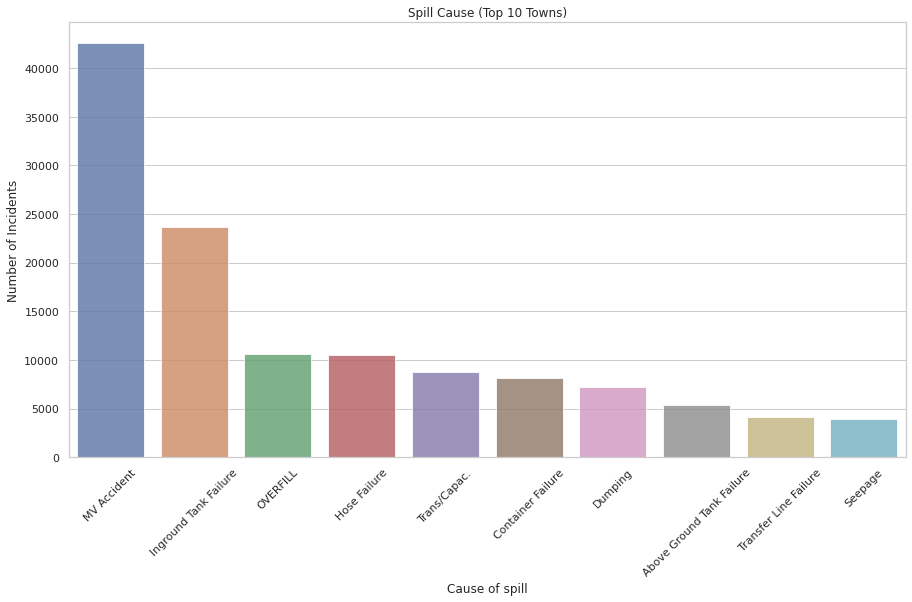

In [ ]:
# histogram to show spill cause (top 10)
spill_cause= df_obj1_new['Cause Info'].value_counts()
spill_cause = spill_cause[:10,]
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.barplot(spill_cause.index, spill_cause.values, alpha=0.8)
plt.title('Spill Cause (Top 10 Towns)')
plt.ylabel('Number of Incidents', fontsize=12)
plt.xlabel('Cause of spill', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Further, we remove unwanted syntax and spaces from the Total Quantity Gallons column and 
# converted the object type to float to perform mathematical operations.
df_obj1_new['Total Quantity Gallons'] = df_obj1_new['Total Quantity Gallons'].str[2:]
df_obj1_new['Total Quantity Gallons'] = df_obj1_new['Total Quantity Gallons'].str.strip()

In [ ]:
df_obj1_new['Total Quantity Gallons'] = df_obj1_new['Total Quantity Gallons'].astype('float')
print(df_obj1_new.dtypes) # to check data type

Year                              int64
Case No.                          int64
Assigned to                      object
Date Reported Time Reported      object
Release date and time            object
Town of Release                  object
State of Release                 object
Reported By                      object
Representing                     object
Responsible Party State          object
Location Of Reported Release     object
Release Type                     object
Release Substance                object
Total Quantity Gallons          float64
Total Quantity Yards             object
Total Quantity Feet              object
Total Quantity Drums             object
Total Quantity Pounds            object
Corrective Actions Taken         object
Cause Info                       object
Media Info                       object
dtype: object


In [ ]:
# We made pivot table to add the values of total quantity gallon again respective
pv_table = pd.DataFrame(pd.pivot_table(df_obj1_new, values=['Total Quantity Gallons'], index=['Year'], aggfunc=np.sum)).reset_index()
pv_table.head(5)

,Year,Total Quantity Gallons
0,1996,17185.50
1,1997,80780.50
2,1998,252823.45
3,1999,603708.46
4,2000,798845.44


### **4. Total spill quantity per year**

  In the below plot we can see in the year 2006 has maximum quantity of oil spill as compared to other years followed by year 2001 and 2011. 

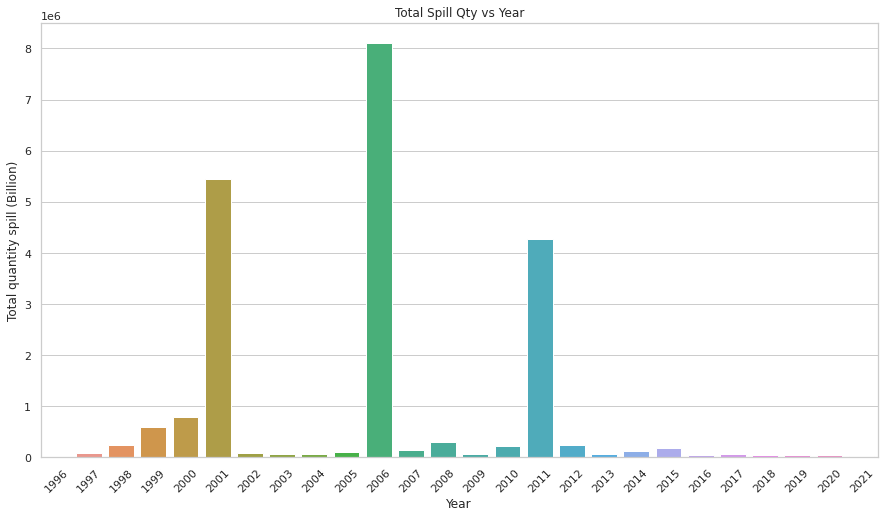

In [ ]:
# plot of total spill quantity per year
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.barplot( data=pv_table, y='Total Quantity Gallons', x='Year')
plt.title('Total Spill Qty vs Year')
plt.ylabel('Total quantity spill (Billion)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

### **5. Release type**

  As we can see from the plot, the petroleum is the maximum released oil type. This plot will help the Department of Energy and Environmental Protection (CT DEEP) to pay more attention towards this particular oil as it has maximum quantity of oil spill.

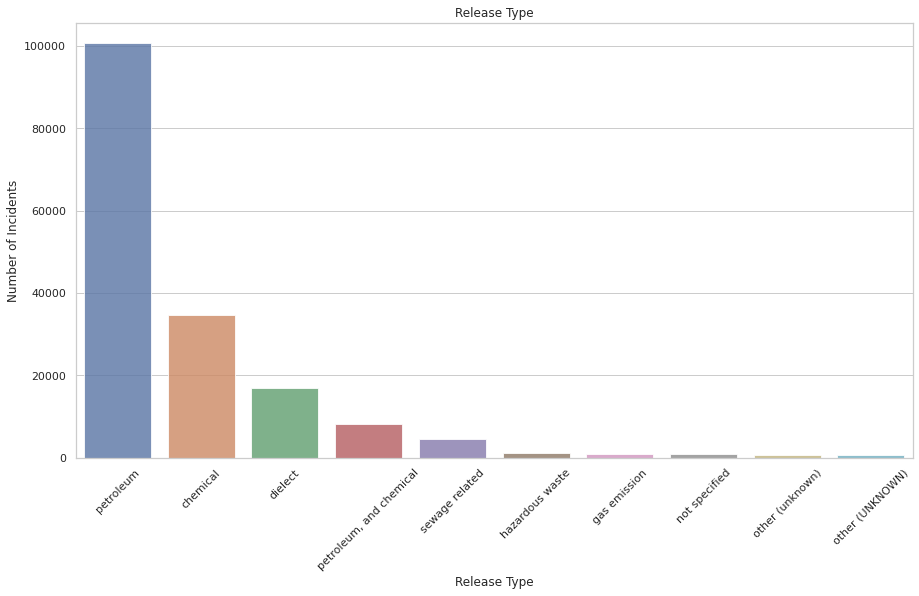

In [ ]:
# number of oil spill cases vs release type
release_type= df_obj1_new['Release Type'].value_counts()
release_type = release_type[:10,]
plt.figure(figsize=(15,8))
sns.barplot(release_type.index, release_type.values, alpha=0.8)

plt.title('Release Type')
plt.ylabel('Number of Incidents', fontsize=12)
plt.xlabel('Release Type', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

## **External Dataset**

---


### **Importing the External Dataset**

We found this dataset on https://public.emdat.be/data using the query tool by choosing Technological Disaster type while covering the US(selected) region. 

![picture](https://www.emdat.be/sites/default/files/Maps/2010/map1.jpg)
Source: https://www.emdat.be/sites/default/files/Maps/2010/map1.jpg

The main objective of the database is to serve the purposes of humanitarian action at national and international levels. The initiative aims to rationalise decision making for disaster preparedness, as well as provide an objective base for vulnerability assessment and priority setting.

EM-DAT contains essential core data on the occurrence and effects of over 22,000 mass disasters in the world from 1900 to the present day. The database is compiled from various sources, including UN agencies, non-governmental organisations, insurance companies, research institutes and press agencies.

######**Details of the Dataset: https://www.emdat.be/**

###About the Dataset
The dataset that we considered consists of subset of 41 Rows and 48 columns which shows the record of technological disasters about oil, chemical, and gaseous spills that happened in certain regions of the US from 1900 till the present date. While merging this dataset to the original Spill Incident dataset, we are enriching the values of the dataset with attributes like 'Number of people Affected', 'Number of Injuries', 'Number of Deaths', 'CPI', etc. 

In [ ]:
# Importing the external Dataset
URL2 = 'https://drive.google.com/file/d/1YbL4GADzEQwHZ1t6iTmAi_uMu8278JS2/view?usp=sharing'

fixed_path2 = 'https://drive.google.com/uc?export=download&id='

# Step 3: Extract the file ID from the URL (this part of the command is fixed)
file_path2 = URL2.split('/')[-2]

# Retrieve the CSV data and build a dataframe
df_external = pd.read_csv(fixed_path2 + file_path2)

# Number of lines and columns
print(df_external.shape)

# First lines of the dataframe
df_external.head()

(41, 48)


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,State,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1974-0088-USA,1974,88,NaN,Technological,Technological,Industrial accident,Chemical spill,NaN,NaN,United States of America (the),USA,Northern America,Americas,Decatur,GA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m3,NaN,NaN,NaN,NaN,1974,NaN,NaN,1974,NaN,NaN,7.0,152.0,NaN,NaN,152.0,NaN,NaN,NaN,19.051854,NaN,NaN,NaN,NaN
1,1975-0094-USA,1975,94,NaN,Technological,Technological,Industrial accident,Chemical spill,NaN,LPG,United States of America (the),USA,Northern America,Americas,Eagle Pass,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m3,NaN,NaN,NaN,NaN,1975,NaN,NaN,1975,NaN,NaN,17.0,34.0,NaN,NaN,34.0,NaN,NaN,NaN,20.793799,NaN,NaN,NaN,NaN
2,1975-0095-USA,1975,95,NaN,Technological,Technological,Industrial accident,Chemical spill,NaN,Chlorine,United States of America (the),USA,Northern America,Americas,Niagara Falls,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m3,NaN,NaN,NaN,NaN,1975,NaN,NaN,1975,NaN,NaN,4.0,176.0,NaN,NaN,176.0,NaN,NaN,NaN,20.793799,NaN,NaN,NaN,NaN
3,1975-0097-USA,1975,97,NaN,Technological,Technological,Industrial accident,Chemical spill,NaN,Ammonia,United States of America (the),USA,Northern America,Americas,Houston,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m3,NaN,NaN,NaN,NaN,1975,NaN,NaN,1975,NaN,NaN,6.0,178.0,NaN,NaN,178.0,NaN,NaN,NaN,20.793799,NaN,NaN,NaN,NaN
4,1975-0098-USA,1975,98,NaN,Technological,Technological,Industrial accident,Chemical spill,NaN,Ammonia,United States of America (the),USA,Northern America,Americas,Deer Park,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m3,NaN,NaN,NaN,NaN,1975,NaN,NaN,1975,NaN,NaN,5.0,200.0,NaN,NaN,200.0,NaN,NaN,NaN,20.793799,NaN,NaN,NaN,NaN


### **Understand the data**

Before cleaning data, there are a couple of things we would like to know, for example, the dimension of a dataset, the data type of each variable, the first few rows and name of each variable, etc. For this we will use df_external.columns to return all the column name and df_external.info to print a concise summary of a DataFrame. 

In [ ]:
print(df_external.columns) #Checking the Columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'State', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')


In [ ]:
#Checking Datatypes and Null Values
df_external.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           41 non-null     object 
 1   Year                             41 non-null     int64  
 2   Seq                              41 non-null     int64  
 3   Glide                            0 non-null      float64
 4   Disaster Group                   41 non-null     object 
 5   Disaster Subgroup                41 non-null     object 
 6   Disaster Type                    41 non-null     object 
 7   Disaster Subtype                 41 non-null     object 
 8   Disaster Subsubtype              0 non-null      float64
 9   Event Name                       34 non-null     object 
 10  Country                          41 non-null     object 
 11  ISO                              41 non-null     object 
 12  Region                  

### **Exploring and Cleaning the External Dataset**


#### **Check Missing Values**

Next, we would like to check if there are any missing values. In order to do that, we can use the function dataframe.isnull() in pandas. It will return True for missing components and False for non-missing cells. However, when the dimension of a dataset is large, it could be difficult to figure out the existence of missing values. In general, we may just want to know if there are any missing values first. The function dataframe.isnull().sum() returns the number of missing values in the data set. 

In [ ]:
#Checking the number of nulls in the external dataset
df_external.isnull().sum()

Dis No                              0
Year                                0
Seq                                 0
Glide                              41
Disaster Group                      0
Disaster Subgroup                   0
Disaster Type                       0
Disaster Subtype                    0
Disaster Subsubtype                41
Event Name                          7
Country                             0
ISO                                 0
Region                              0
Continent                           0
Location                            0
State                               0
Origin                             41
Associated Dis                     41
Associated Dis2                    41
OFDA Response                      41
Appeal                             37
Declaration                        37
Aid Contribution                   41
Dis Mag Value                      40
Dis Mag Scale                       0
Latitude                           41
Longitude   

In [ ]:
#Checking the null values, if the there is a null value, it will print True
df_external.isna() 

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,State,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,False,False,True,True,False,True,True,True,False,True,True,True,True
1,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,False,False,True,True,False,True,True,True,False,True,True,True,True
2,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,False,False,True,True,False,True,True,True,False,True,True,True,True
3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,False,False,True,True,False,True,True,True,False,True,True,True,True
4,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,False,False,True,True,False,True,True,True,False,True,True,True,True
5,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,True,True,False,True,False,True,True,True,False,True,True,True,True
6,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,True,False,False,True,False,True,True,True,False,True,True,True,True
7,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,True,True,False,True,False,True,True,True,False,True,True,True,True
8,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,True,False,False,True,False,True,True,True,False,True,True,True,True
9,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,True,False,False,True,False,True,True,True,False,True,True,True,True


In [ ]:
# To find out the percentage of missing value in each column we use the following function
df_external.isnull().sum() * 100/len(df_external)

Dis No                               0.000000
Year                                 0.000000
Seq                                  0.000000
Glide                              100.000000
Disaster Group                       0.000000
Disaster Subgroup                    0.000000
Disaster Type                        0.000000
Disaster Subtype                     0.000000
Disaster Subsubtype                100.000000
Event Name                          17.073171
Country                              0.000000
ISO                                  0.000000
Region                               0.000000
Continent                            0.000000
Location                             0.000000
State                                0.000000
Origin                             100.000000
Associated Dis                     100.000000
Associated Dis2                    100.000000
OFDA Response                      100.000000
Appeal                              90.243902
Declaration                       

#### **Removing Columns with high null values**
In this case we are dropping columns with null values above, i.e. 60% or above missing values. Unlike in the case of the original dataset where we took 20% as the cut off for the missing values of the columns, here we have taken a higher number because the dataset is already very small and we did not want to lose important data that was there in the columns 'No Injured' and 'No Affected'. We removed these columns - 'Glide', 'Disaster Subsubtype', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Latitude', 'Longitude', 'River Basin', 'Start Month', 'Start Day', 'End Month', 'End Day', 'Total Deaths', 'No Homeless','Reconstruction Costs', 'Insured Damages', 'Total Damages', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations', 'Local Time'. 

In [ ]:
# Cleaning the external dataset -> dropping the columns with a very high percentage of nulls
# Removing Columns with high null values
df_external = df_external.drop(['Glide','Disaster Subsubtype','Origin','Associated Dis','Associated Dis2','OFDA Response','Appeal','Declaration','Aid Contribution','Dis Mag Value','Latitude','Longitude','River Basin','Start Month','Start Day', 'End Month','End Day','Total Deaths','No Homeless','Reconstruction Costs (\'000 US$)','Insured Damages (\'000 US$)','Total Damages (\'000 US$)','Adm Level','Admin1 Code','Admin2 Code','Geo Locations','Local Time'], axis=1, inplace=False)
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             41 non-null     object 
 1   Year               41 non-null     int64  
 2   Seq                41 non-null     int64  
 3   Disaster Group     41 non-null     object 
 4   Disaster Subgroup  41 non-null     object 
 5   Disaster Type      41 non-null     object 
 6   Disaster Subtype   41 non-null     object 
 7   Event Name         34 non-null     object 
 8   Country            41 non-null     object 
 9   ISO                41 non-null     object 
 10  Region             41 non-null     object 
 11  Continent          41 non-null     object 
 12  Location           41 non-null     object 
 13  State              41 non-null     object 
 14  Dis Mag Scale      41 non-null     object 
 15  Start Year         41 non-null     int64  
 16  End Year           41 non-nu

In [ ]:
# Checking the percentage of missing values after dropping the columns
df_external.isnull().sum() * 100/len(df_external)

Dis No                0.000000
Year                  0.000000
Seq                   0.000000
Disaster Group        0.000000
Disaster Subgroup     0.000000
Disaster Type         0.000000
Disaster Subtype      0.000000
Event Name           17.073171
Country               0.000000
ISO                   0.000000
Region                0.000000
Continent             0.000000
Location              0.000000
State                 0.000000
Dis Mag Scale         0.000000
Start Year            0.000000
End Year              0.000000
No Injured           41.463415
No Affected          39.024390
Total Affected        4.878049
CPI                   0.000000
dtype: float64

## **Merging the datasets for Data Enrichment**

---

In [ ]:
# Merging the datasets for data enrichment

# Renaming the column name in the external dataset for the outer merge to work!

df_external.rename(columns={'State': 'State of Release'}, inplace=True)

merged_year_state_df = pd.merge(df_obj1_new, df_external, how='outer', on=['Year','State of Release'])

# Checking the Results
merged_year_state_df.info()
merged_year_state_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174308 entries, 0 to 174307
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year                          174308 non-null  int64  
 1   Case No.                      174267 non-null  float64
 2   Assigned to                   174267 non-null  object 
 3   Date Reported Time Reported   174267 non-null  object 
 4   Release date and time         174267 non-null  object 
 5   Town of Release               174267 non-null  object 
 6   State of Release              174308 non-null  object 
 7   Reported By                   174267 non-null  object 
 8   Representing                  174267 non-null  object 
 9   Responsible Party State       174267 non-null  object 
 10  Location Of Reported Release  174267 non-null  object 
 11  Release Type                  174267 non-null  object 
 12  Release Substance             174267 non-nul

,Year,Case No.,Assigned to,Date Reported Time Reported,Release date and time,Town of Release,State of Release,Reported By,Representing,Responsible Party State,Location Of Reported Release,Release Type,Release Substance,Total Quantity Gallons,Total Quantity Yards,Total Quantity Feet,Total Quantity Drums,Total Quantity Pounds,Corrective Actions Taken,Cause Info,Media Info,Dis No,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,Country,ISO,Region,Continent,Location,Dis Mag Scale,Start Year,End Year,No Injured,No Affected,Total Affected,CPI
0,2002,200208715.0,NO Response,12/14/2002 01:51:00 PM,12/14/2002 12:00:00 AM,NEW BRITAIN,CT,dispatcher 805,new britain f.d.,CT,alan st/ mcclinitock st,chemical,ANTIFREEZE,0.0,0.00,0.00,0.00,0.00,"Sanded, and Cleaned",Other (unknown),Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,200207043.0,NO Response,10/07/2002 08:23:00 AM,10/07/2002 12:00:00 AM,DANBURY,CT,MARJORIE WROGG,"TANKWORKS, INC.",FL,3 TOWN HILL AVENUE,petroleum,#2 FUEL OIL,0.0,0.00,0.00,0.00,0.00,"Contained, and Contracted, and Removed Tank, a...",Inground Tank Failure,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,200205263.0,NO Response,08/02/2002 12:47:00 PM,08/02/2002 12:00:00 AM,TRUMBULL,CT,MEG MONTGOMERY,ENVIRONMENTAL REMEDIATION SERVICES,CT,128 WOOLSLY AVE,petroleum,#2 FUEL OIL,0.0,0.00,0.00,0.00,0.00,"Removed Tank, and Soil Removed",Inground Tank Failure,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,200206871.0,NO Response,09/30/2002 12:04:00 PM,09/30/2002 12:00:00 AM,FAIRFIELD,CT,TRICHA,ABSOLUTE TANK,CT,455 FAIRFIELD HILLS ROAD,petroleum,#2 FUEL OIL,0.0,0.00,0.00,0.00,0.00,Removed Tank,Inground Tank Failure,Other (SUBSURFACE),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,200201017.0,NO Response,02/18/2002 10:55:00 AM,02/18/2002 12:00:00 AM,HEBRON,CT,maureen duffy,Self,CT,244 martin rd,chemical,SULFURIC ACID,0.0,0.00,0.00,0.00,0.00,"Removed, and Contained, and Cleaned",Container Failure,Inside Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Building Visualization from the merged dataset**

This visualization shows the number of people affected ranging from the years 1978 to 1998. A subset from 1978 to 1998 has been created from the external dataset (as the data imported from the external dataset has records for the concerned column only within the Year range 1978 to 1998). For building the viz, we have first of all created a pivot table from the Total Affected and Year columns, which has further been used in a Bar plot, as shown below. The columns which are being used here for the visualizations are "Total Affected", "No Injured", and "CPI". We have discussed further on these attributes below along with the visualizations.

### **Creating Data Subset**



In [ ]:
# Select observations between a range of Years
merged_1978_to_1998 = merged_year_state_df[(merged_year_state_df['Year'] >= 1978) & (merged_year_state_df['Year'] <= 1998)]

merged_1978_to_1998.head()

,Year,Case No.,Assigned to,Date Reported Time Reported,Release date and time,Town of Release,State of Release,Reported By,Representing,Responsible Party State,Location Of Reported Release,Release Type,Release Substance,Total Quantity Gallons,Total Quantity Yards,Total Quantity Feet,Total Quantity Drums,Total Quantity Pounds,Corrective Actions Taken,Cause Info,Media Info,Dis No,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,Country,ISO,Region,Continent,Location,Dis Mag Scale,Start Year,End Year,No Injured,No Affected,Total Affected,CPI
31407,1998,9805842.0,NO Response,08/30/1998 11:20:00 AM,08/30/1998 12:00:00 AM,WOODBRIDGE,CT,MR. H0RWITZ,Self,CT,24 OAKHILL LANE,chemical,MALATHION,0.0,0.00,0.00,0.00,0.00,Cleaned,Other (BROKEN BOTTLE),Inside Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31408,1998,9801619.0,NO Response,03/21/1998 04:16:00 PM,03/21/1998 04:08:00 PM,CROMWELL,CT,kathy,cromwell fire,CT,rt 9,chemical,ANTIFREEZE,0.0,0.00,0.00,0.00,0.00,Cleaned,MV Accident,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31409,1998,9802573.0,NO Response,04/30/1998 11:56:00 AM,04/30/1998 12:00:00 AM,MARLBOROUGH,CT,art wallace,NU CL&P,CT,stoney brook drive,dielect,TRANSFORMER OIL,20.0,0.00,0.00,0.00,0.00,"Removed, and Contained, and Cleaned",Trans/Capac.,"Ground Surface, and Other (Pad mount)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31410,1998,9802848.0,NO Response,05/11/1998 03:27:00 PM,05/11/1998 12:00:00 AM,EAST HARTFORD,CT,JOE WILCOX,Self,CT,BURNHAM STREET,petroleum,DIESEL FUEL,0.0,0.00,0.00,0.00,0.00,"Other (INVESTIGATED), and Investigated","Dumping, and Seepage",Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31411,1998,9800853.0,NO Response,02/17/1998 03:57:00 AM,02/17/1998 12:00:00 AM,TOLLAND,CT,TOLLAND DISPATCH,Self,CT,I-84 E/B EAST OF EXIT 67,petroleum,DIESEL FUEL,0.0,0.00,0.00,0.00,0.00,Sanded,Fuel Tank Failure,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Creating the Pivot Table**

In [ ]:
#Creating Pivot Table before visualizing Total Affected by Year
pv_table1 = pd.DataFrame(pd.pivot_table(merged_1978_to_1998, values=['Total Affected'], index=['Year'], aggfunc=np.sum)).reset_index()
pv_table1.head(2)

,Year,Total Affected
0,1978,3614.0
1,1979,211714.0


### **Building the Visualizations from the Merged Dataset**

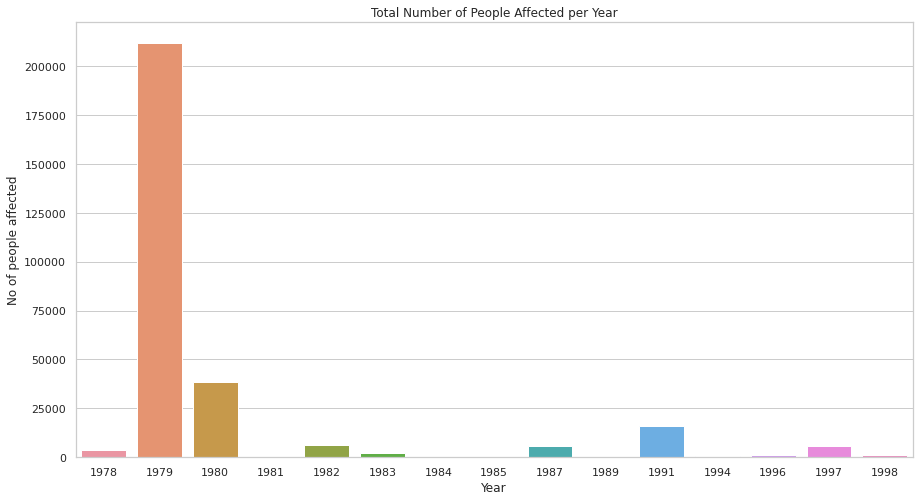

In [ ]:
plt.figure(figsize=(15,8)) #Setting the size of the plot
sns.set_theme(style="whitegrid") #Selecting Theme
sns.barplot( data=pv_table1, y='Total Affected', x='Year') #Using seaborn library we are building histogram of 'Total Affected' by 'Year' 
plt.title('Total Number of People Affected per Year') #Adding the Title
plt.ylabel('No of people affected', fontsize=12) #Naming the Y axis
plt.xlabel('Year', fontsize=12) #Naming the x axis
plt.show()

The plot shows affected cases year wise based on the data selected. Year 1979 particularly marks the highest number of affected cases. This could be due to Major disater events in the history including The Atlantic Empress Oil Spill (1979) and The Ixtoc 1 Oil Spill (1979).

In [ ]:
#Creating Pivot Table before visualizing Total Affected by Year

pv_table2 = pd.DataFrame(pd.pivot_table(merged_1978_to_1998, values=['No Injured'], index=['Year'], aggfunc=np.sum)).reset_index()
pv_table2.head(2)

,Year,No Injured
0,1978,114.0
1,1979,14.0


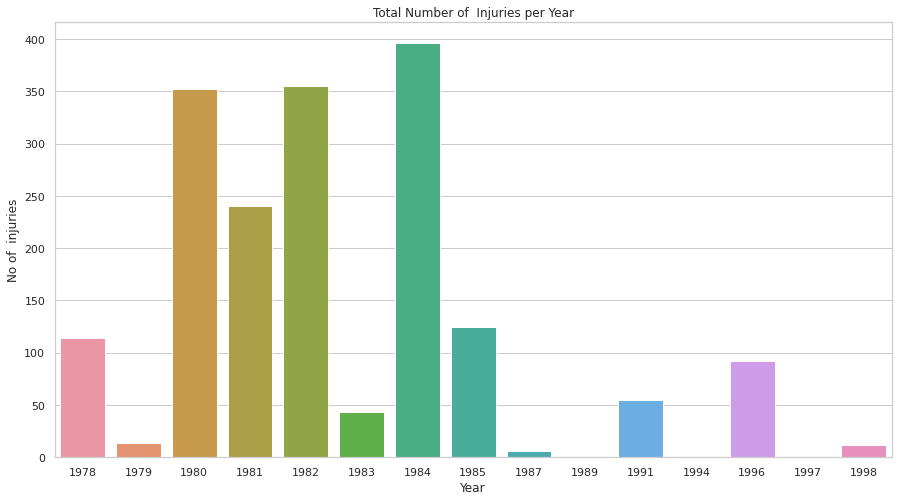

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.barplot( data=pv_table2, y='No Injured', x='Year')
plt.title('Total Number of  Injuries per Year')
plt.ylabel('No of  injuries', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

The number of injuries are generally low when compared to affected cases. The plot shows a consistency of cases from the year 1978 to 1985 and then their is a downward trend till the year 1998. The majority of injuries are caused due to fire explosion incidents resulting in the leakage of oil/chemicals.

In [ ]:
import plotly.express as px
fig = px.area(df_external, x='Year', y="CPI")
fig.show()

CPI is the **Carbon Preference Index** which calculates the molecular ratio often used to assign the biological source and maturity of organic matter. It is an index that identifies and differentiates between biological sources and crude oil sources of hydrocarbons. 

When the CPI value for a sample of hydrocarbons is close to unity or in this case 100(%), it is most likely that the hydrocarbons originate from crude oil or an oil spill. 

**We observe a strong upward trend over the years which tells the rise in CPI index. It also reflects the rising concern about the impact it has on the environment causing mass pollution of environmental bodies and the number of lives affected by the spillage.** 

# **Brute-force Search applied to Crew Scheduling**

---


## **Data Preparation**



---

### **Data Extraction from CSV File**

In [ ]:
# URL where the data is present
URL = 'https://drive.google.com/file/d/1tmRjtOpwPOJwV3lsmQWZ-ExDYpjnXnoB/view?usp=sharing'

fixed_path = 'https://drive.google.com/uc?export=download&id='

# Extract the file ID from the URL (this part of the command is fixed)
file_path = URL.split('/')[-2]

# Retrieve the CSV data and build a dataframe
df = pd.read_csv(fixed_path + file_path)

# Number of lines and columns
print(df.shape)

# First lines of the dataframe
df.head()

(193869, 29)


,Year,Case No.,Assigned to,Date Reported Time Reported,Release date and time,Town of Release,State of Release,Reported By,Representing,Responsibile Party/Discharger,Responsible Party Address,Responsible Party Town,Responsible Party State,Responsible Party Zip,Responsible Party Accepts Responsibility (Y/N),Location Of Reported Release,Release Type,Release Substance,Total Quantity Gallons,Total Quantity Yards,Total Quantity Feet,Total Quantity Drums,Total Quantity Pounds,Emergency Measures,Type of Waterbody Affected,Waterbodies Affected,Corrective Actions Taken,Cause Info,Media Info
0,2006,200602190,"THIGPEN, DONNELL",04/18/2006 12:10:00 PM,04/18/2006 12:00:00 AM,MONROE,CT,DISPATCH,FD,MVA,NaN,NaN,CT,NaN,False,RTE 110 NEAR OLD TANNERY RD,petroleum,DIESEL FUEL,20.00,0.00,0.00,0.00,0.00,"DUMP TRUCK FIRE, DIESEL INTO STORM DRAIN",NaN,Catch Basin,NaN,Fire,"Surface Water, and Ground Surface"
1,2002,200208715,NO Response,12/14/2002 01:51:00 PM,12/14/2002 12:00:00 AM,NEW BRITAIN,CT,dispatcher 805,new britain f.d.,NaN,NaN,NaN,CT,NaN,True,alan st/ mcclinitock st,chemical,ANTIFREEZE,2.00,0.00,0.00,0.00,0.00,NaN,none,Other (none),"Sanded, and Cleaned",Other (unknown),Ground Surface
2,2012,201206586,NO Response,11/12/2012 12:07:00 PM,11/12/2012 12:00:00 AM,Easton,CT,Bart Liquigli,Complete Tank LLC,Mrs. Sweeney,NaN,NaN,CT,NaN,True,106 sport hill road,petroleum,#2 FUEL OIL,0.00,0.00,0.00,0.00,0.00,550 UST,NaN,Other (none),Removed Tank,Inground Tank Failure,Other (soil)
3,2002,200207043,NO Response,10/07/2002 08:23:00 AM,10/07/2002 12:00:00 AM,DANBURY,CT,MARJORIE WROGG,"TANKWORKS, INC.",BAYVIEW FINANCIAL,2601 SOUTH BAY SHORE,MIAMI,FL,33133-,True,3 TOWN HILL AVENUE,petroleum,#2 FUEL OIL,0.00,0.00,0.00,0.00,0.00,REMOVAL OF A 550 - GALLON LUST - MINIMAL SOIL ...,NaN,NaN,"Contained, and Contracted, and Removed Tank, a...",Inground Tank Failure,Ground Surface
4,2008,200801170,"SCALORA, RICH",02/28/2008 08:29:00 AM,02/28/2008 08:29:00 AM,NEW LONDON,CT,MIKE MCCARTHY,MCCARTHY OIL,MCCARTHY OIL,50 ROUTE 32,QUAKER HILL,CT,06375,True,330 pequot avenue,petroleum,#2 FUEL OIL,8.00,0.00,0.00,0.00,0.00,SPEEDY DRYED AND HAVE BEEN THERE SEVERAL TIMES...,NaN,NaN,NaN,OVERFILL,"Ground Surface, and Other (BASEMENT)"


### **Data Filtering**

We will filter the data by Town of Release as - 
1.   Simsbury
2.   Fairfield
3. Windsor

But before filtering the data we will make the characters of the column Town of Release to lower so that we get all the rows matching the filter. 



In [ ]:
# Converting Town of Release to lower characters 
df['Town of Release'] = df['Town of Release'].str.lower()

# Giving all the filters in OR condition 
df_opt = df[(df['Town of Release'] == 'simsbury') | (df['Town of Release'] == 'fairfield') | (df['Town of Release'] == 'windsor') ]
df_opt.head()

,Year,Case No.,Assigned to,Date Reported Time Reported,Release date and time,Town of Release,State of Release,Reported By,Representing,Responsibile Party/Discharger,Responsible Party Address,Responsible Party Town,Responsible Party State,Responsible Party Zip,Responsible Party Accepts Responsibility (Y/N),Location Of Reported Release,Release Type,Release Substance,Total Quantity Gallons,Total Quantity Yards,Total Quantity Feet,Total Quantity Drums,Total Quantity Pounds,Emergency Measures,Type of Waterbody Affected,Waterbodies Affected,Corrective Actions Taken,Cause Info,Media Info
8,2006,200601203,NO Response,03/02/2006 12:34:00 PM,03/02/2006 12:00:00 AM,simsbury,CT,DISPATCHER SCULLY,SIMSBURY FIRE DEPARTMENT,MVA,NaN,NaN,CT,NaN,True,98 DEERPARK ROAD,chemical,ANTIFREEZE,1.00,0.00,0.00,0.00,0.00,MINOR RELEASE TO ASPHALT.,NaN,NaN,"Removed, and Contained, and Sanded",MV Accident,Ground Surface
11,2013,201302264,NO Response,05/11/2013 11:44:00 AM,05/11/2013 12:00:00 AM,simsbury,CT,gaines,fd,NaN,NaN,NaN,CT,NaN,NaN,bushy hill and stratton brook,chemical,ANTIFREEZE,0.00,0.00,0.00,0.00,0.00,contents of one radiator fluid,NaN,Other (none),Sanded,MV Accident,Ground Surface
23,2001,200101674,NO Response,03/19/2001 08:45:00 PM,03/19/2001 08:45:00 PM,fairfield,CT,tim kellerman,connecticut tank removal,NaN,NaN,NaN,CT,NaN,NaN,449 judd street,petroleum,#2 FUEL OIL,20.00,0.00,0.00,0.00,0.00,removed tank / referred to 902,NaN,NaN,"Referred, and Removed Tank",Inground Tank Failure,Inside Building
24,2020,202004105,NO Response,09/06/2020 08:37:00 PM,09/06/2020 08:18:00 PM,simsbury,CT,Ruth,FD,NaN,NaN,NaN,CT,NaN,NaN,Hopmeadow St. at Hartford Rd.,chemical,ANTIFREEZE,0.50,0.00,0.00,0.00,0.00,Speedi-dri,None,NaN,Sanded,MV Accident,Ground Surface
39,2002,200206871,NO Response,09/30/2002 12:04:00 PM,09/30/2002 12:00:00 AM,fairfield,CT,TRICHA,ABSOLUTE TANK,MICHEAL ROBERG,SAA,SAA,CT,NaN,True,455 FAIRFIELD HILLS ROAD,petroleum,#2 FUEL OIL,0.00,0.00,0.00,0.00,0.00,"550 LUST, SAMPLES TAKEN, CONTAMINATION EXSISTS...",NaN,Other (ANA),Removed Tank,Inground Tank Failure,Other (SUBSURFACE)


We have total of 6760 rows with above three Towns. 

In [ ]:
# Shape of the data set - number of rows and columns
df_opt.shape

# Info of the data set before removing missing values
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6760 entries, 8 to 193807
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Year                                            6760 non-null   int64 
 1   Case No.                                        6760 non-null   int64 
 2   Assigned to                                     6760 non-null   object
 3   Date Reported Time Reported                     6760 non-null   object
 4   Release date and time                           6740 non-null   object
 5   Town of Release                                 6760 non-null   object
 6   State of Release                                6760 non-null   object
 7   Reported By                                     6760 non-null   object
 8   Representing                                    6743 non-null   object
 9   Responsibile Party/Discharger                   36

### **Data Manipulation**



#### Missing Values

Both the problem statements are based on Repair Time which is calculated by Total Quantity Gallons. We have 5 rows where value of Total Quantity Gallons is missing therefore we will remove those rows. 

In [ ]:
# Removing missing values from Total Quantity Gallons 
bool_series = pd.notnull(df_opt["Total Quantity Gallons"])
df_opt = df_opt[bool_series]

# After removing missing values
df_opt.isnull().sum()

Year                                                 0
Case No.                                             0
Assigned to                                          0
Date Reported Time Reported                          0
Release date and time                               20
Town of Release                                      0
State of Release                                     0
Reported By                                          0
Representing                                        17
Responsibile Party/Discharger                     3114
Responsible Party Address                         5222
Responsible Party Town                            5601
Responsible Party State                              0
Responsible Party Zip                             5680
Responsible Party Accepts Responsibility (Y/N)    4101
Location Of Reported Release                         3
Release Type                                         0
Release Substance                                   10
Total Quan

In [ ]:
# Shape of the data set after removing missing values - number of rows and columns
df_opt.shape

# Info of the data set after removing missing values
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6755 entries, 8 to 193807
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Year                                            6755 non-null   int64 
 1   Case No.                                        6755 non-null   int64 
 2   Assigned to                                     6755 non-null   object
 3   Date Reported Time Reported                     6755 non-null   object
 4   Release date and time                           6735 non-null   object
 5   Town of Release                                 6755 non-null   object
 6   State of Release                                6755 non-null   object
 7   Reported By                                     6755 non-null   object
 8   Representing                                    6738 non-null   object
 9   Responsibile Party/Discharger                   36

In [ ]:
# Fetching Unique values of column Total Quantity Gallons to check if cleaning is required
df_opt['Total Quantity Gallons'].unique()

array(['1.00', '0.00', '20.00', '0.50', '1000.00', '275.00',
       '~      3.00', '<     40.00', '<      2.00', '~     30.00',
       '~    200.00', '<      1.00', '2.00', '~     10.00', '3.00',
       '3.25', '35.00', '<     50.00', '5.00', '25.00', '~     80.00',
       '<      5.00', '1.50', '<      6.00', '<      3.00', '40.00',
       '200.00', '~      4.00', '<    250.00', '~      5.00', '0.01',
       '50.00', '10.00', '30.00', '4.00', '250.00', '450.00',
       '<     20.00', '-1.00', '~     50.00', '15.00', '55.00',
       '~     15.00', '100.00', '<     30.00', '2.50', '+     20.00',
       '~      1.00', '<      0.50', '~   1000.00', '~      6.00',
       '<      4.00', '<     10.00', '+     40.00', '<    100.00', '0.72',
       '+     15.00', '230.00', '75.00', '~      2.00', '+    150.00',
       '<      0.25', '+     25.00', '550.00', '0.13', '<     60.00',
       '~      0.50', '220.00', '<      0.10', '8.00', '150.00', '60.00',
       '~     20.00', '~     25.00', '0.2

#### Data Cleaning 

As we can see above Total Quantity Gallons has some characters, we will remove all the inequalites and treat all the rows as equality. This will help in doing some arthimatic operations on Total Quantity Gallons column. 

In [ ]:
# By str[2:] operation the first two characters will be eliminated from the column and rest will be shown.
df_opt['Total Quantity Gallons'] = df_opt['Total Quantity Gallons'].str[2:]

# strip function removes all the leading and trailing spaces. 
df_opt['Total Quantity Gallons'] = df_opt['Total Quantity Gallons'].str.strip()

# To verify if special characters and spaces is removed
df_opt['Total Quantity Gallons'].unique()


array(['00', '.00', '50', '00.00', '5.00', '3.00', '40.00', '2.00',
       '30.00', '200.00', '1.00', '10.00', '25', '50.00', '80.00', '6.00',
       '0.00', '4.00', '250.00', '01', '20.00', '15.00', '0.50',
       '1000.00', '100.00', '72', '150.00', '0.25', '25.00', '13',
       '60.00', '0.10', '18.00', '67.00', '12.00', '1.50', '40', '0.05',
       '470.00', '9.00', '1015.00', '500.00', '325.00', '8.00', '55.00',
       '16.00', '03', '0.06', '400.00', '7.00', '0.13', '75.00', '155.00',
       '300.00', '70.00', '0.01', '85.00', '5000.00', '0000.00', '10',
       '0.75', '1500.00', '275.00', '13.00', '45.00', '000.00', '20',
       '35.00', '600.00', '14.00', '0.20', '75', '1.25', '70', '1600.00',
       '130.00'], dtype=object)

As we know that Total Quantity Gallons column was of type object and we converted into string to remove special characters and spaces but to perform arthimatic operations we will convert Total Quantity Gallons column to float.

In [ ]:
# Coverting column to datatype float
df_opt['Total Quantity Gallons'] = df_opt['Total Quantity Gallons'].astype('float')

# Verifying types of column 
print(df_opt.dtypes)

Year                                                int64
Case No.                                            int64
Assigned to                                        object
Date Reported Time Reported                        object
Release date and time                              object
Town of Release                                    object
State of Release                                   object
Reported By                                        object
Representing                                       object
Responsibile Party/Discharger                      object
Responsible Party Address                          object
Responsible Party Town                             object
Responsible Party State                            object
Responsible Party Zip                              object
Responsible Party Accepts Responsibility (Y/N)     object
Location Of Reported Release                       object
Release Type                                       object
Release Substa

## **First Problem - Minimizes the sum of the repair times**

---

**Objective** - 

Let us suppose that Gc gallons spilled in all city c, and let us assume that Xccrews were assigned to city c. Then, the repair time of all incidents in c is Gc/Xc, i.e., more crews solve the incidents faster.

*Variables Used* - \
XS = Crews Assigned to city Simsbury\
XF = Crews Assigned to city Fairfield\
XW = Crews Assigned to city Windsor

The total gallons spilled for each city c in C is equal to the total number of gallons spilled by all incidents in c. 

In the original dataset, we have column 'Total Quantity Gallons' and we will sum it for each city.  (Gc) 

GS = 'Total Quantity Gallons' spilled in city Simsbury\
GF = 'Total Quantity Gallons' spilled in city Fairfield\
GW = 'Total Quantity Gallons' spilled in city Windsor

gallon_spilled dictionary is created to store GS, GF and GW. 


**Solution** - 

Repair time is given by Gc/Xc and we have to minimise the total repair time taken by Simsbury, Fairfield and Windsor. 

Therefore, our objective function is given as below - 

Minimize (Repair time (RT)) = GS/XS + GF/XF + GW/XW 

**Contraints** - 
1.   Each crew can only be assigned to one city

     XS + XF + XW = 10 

2.   For each city, you must assign at least one crew. 
     XS, XF, XW > = 1
3.   Total crews: 10 
4. In the sum of repair time problem, our lower and upper bounds for crews for each city is 1 and max is 8. As even if 2 Towns have minimum crew assigned which is 1 then also the third town can have maximum of 8 crews assigned as sum of crews assigned cannot be greater than 10.


#### Step 1  

To calculate Total gallons spilled for each city we will group by each city and add the total quantity gallons. 

In [ ]:
# Extracting Town of Release and  Sum of Total Quantity Gallons 
df_groupby_town = df_opt.groupby(['Town of Release'])['Total Quantity Gallons'].sum().round(2).reset_index()
df_groupby_town

,Town of Release,Total Quantity Gallons
0,fairfield,31731.75
1,simsbury,6553.53
2,windsor,14215.24


#### Step 2 
Creating Dictionary for gallon_spilled

In [ ]:
# Transforming Town of Release and Total Quantity Gallons into a dictionary 
gallon_spilled = pd.Series(df_groupby_town['Total Quantity Gallons'].values,index=df_groupby_town['Town of Release']).to_dict()
gallon_spilled

{'fairfield': 31731.75, 'simsbury': 6553.53, 'windsor': 14215.24}

#### Step 3 
Creating Optimization model

In [ ]:
# Declare the constraints ( Constraint 3)
total_crew = 10

# Declare Variables containing minimum number of crews that can be assigned to any city. ( Constraint 2)
best_XS = 1
best_XF = 1
best_XW = 1 

# Declare decision variable
best_RT = gallon_spilled["simsbury"]/best_XS + gallon_spilled["fairfield"]/best_XF + gallon_spilled["windsor"]/best_XW;

# The range for XS, XF and XW is from 1 to 8 (Contraint 4) 
# FYI - The for loop goes from 1 to 9-1 that is 8 !
for XS in range(1,9):
  for XF in range(1,9):
    for XW in range(1,9):
       # Check total crew is less than equal to 10
        if XS + XF + XW <= total_crew:
          current_RT = gallon_spilled["simsbury"]/XS + gallon_spilled["fairfield"]/XF + gallon_spilled["windsor"]/XW;

        # If current_RT is less than best_RT we will store the new current_RT to best_RT  
        if current_RT < best_RT:
          best_RT = current_RT
          best_XS = XS
          best_XF = XF
          best_XW = XW

# Printing final solution
print("Minimum Repair Time: ",round(best_RT,2))
print("Crew for Simsbury: ",best_XS)
print("Crew for Fairfield: ",best_XF)
print("Crew for Windsor: ",best_XW)

Minimum Repair Time:  14361.53
Crew for Simsbury:  2
Crew for Fairfield:  5
Crew for Windsor:  3


## **Second Problem - Minimizes the Maximum of the repair times**

---


**Objective** - 

Identify an assignment of crews to cities that minimizes the maximum repair time among all cities in C, given by 
max cEC Gc/Xc.

*Variables Used* - \
XS = Crews Assigned to city Simsbury\
XF = Crews Assigned to city Fairfield\
XW = Crews Assigned to city Windsor

The total gallons spilled for each city c in C is equal to the total number of gallons spilled by all incidents in c. 

In the original dataset, we have column 'Total Quantity Gallons' and we will sum it for each city.  (Gc) 

GS = 'Total Quantity Gallons' spilled in city Simsbury\
GF = 'Total Quantity Gallons' spilled in city Fairfield\
GW = 'Total Quantity Gallons' spilled in city Windsor

gallon_spilled dictionary is created to store GS, GF and GW. 


**Solution** - 

Repair time is given by Gc/Xc and we have to minimise the maximum total repair time taken by all cities that is Simsbury, Fairfield and Windsor. 

Therefore, our objective function is given as below - 

Minimize ( Maximum of (GS/XS, GF/XF, GW/XW) )

**Contraints** - 
1.   Each crew can only be assigned to one city

     XS + XF + XW = 10 

2.   For each city, you must assign at least one crew. 
     XS, XF, XW > = 1
3.   Total crews: 10 
4. In the sum of repair time problem, our lower and upper bounds for crews for each city is 1 and max is 8. As even if 2 Towns have minimum crew assigned which is 1 then also the third town can have maximum of 8 crews assigned as sum of crews assigned cannot be greater than 10.

#### Step 1 and Step 2 

Same as above problem. 

#### Step 3 
Creating Optimization model

In [ ]:
# Declare the constraints ( Constraint 3)
total_crew = 10

# Declare Variables containing minimum number of crews that can be assigned to any city. ( Constraint 2)
best_XS = 1
best_XF = 1
best_XW = 1 

# Declare decision variable
max_RT = max(gallon_spilled["fairfield"]/best_XF, gallon_spilled["simsbury"]/best_XS, gallon_spilled["windsor"]/best_XW )

# The range for XS, XF and XW is from 1 to 8 (Contraint 4) 
# FYI - The for loop goes from 1 to 9-1 that is 8 !
for XS in range(1,9):
  for XF in range(1,9):
    for XW in range(1,9):
       # Check total crew is less than equal to 10 
        if XS + XF + XW <= total_crew:
          # If condition is satisfied we will calculate Repair time for each city given by current_RTc
          current_RTF = gallon_spilled["fairfield"]/XF
          current_RTS = gallon_spilled["simsbury"]/XS
          current_RTW = gallon_spilled["windsor"]/XW
          # Calculating maximum repair time taken by any city
          current_repair_time = max(current_RTF, current_RTF, current_RTW)

        # If max(current_RTc) given by current_repair_time is less than max_RT we will store the new current_repair_time to best_RT    
        if current_repair_time < max_RT:
          best_XS = XS
          best_XF = XF
          best_XW = XW
          max_RT = current_repair_time

# Printing final solution
print("Minimum of Maximum Repair Time: ",round(max_RT,2))
print("Crew for Simsbury: ",best_XS)
print("Crew for Fairfield: ",best_XF)
print("Crew for Windsor: ",best_XW)

Minimum of Maximum Repair Time:  5288.62
Crew for Simsbury:  1
Crew for Fairfield:  6
Crew for Windsor:  3


##**Problem Findings**

---

* For the first problem where we have to minimize the total 
repair time we got the below solution - 
With the given constraints and the objective function we got our **OPTIMUM SOLUTION as 14361.53 (Total Repair Time)**. Our OPTIMUM VALUE as **2 crews for Simsbury, 5 for Fairfield and 3 for Windsor**. 


* For the second problem where we have to minimize the maximum repair time we got the below solution - 
With the given constraints and the objective function we got our **OPTIMUM SOLUTION as 5288.62 (Minimum of Maximum Repair Time)**. Our OPTIMUM VALUE as **1 crew for Simsbury, 6 for Fairfield and 3 for Windsor**. 

##**Recommendation for CT DEEP**

---

#### We would recommend CT DEEP to assign a higher number of crew members to the town of Fairfield (as mentioned in the above presented optimal solutions), as the total quantity of spill is also higher over there and hence a higher crew member team would ensure the repair to be completed at the fastest pace possible.


#**Conclusion**

---
This project was divided into two parts. The first part involved the exploration of some interesting facts and finding insights from the CT Deep Spill Incidents dataset. We applied various Python techniques learned in this course to understand and clean the dataset. After the cleanup, we worked on the Exploratory data analysis and provided some insights through different visualizations. The most tricky part here was to search for an external dataset that could enrich our original dataset. Eventually, we were able to find a dataset that depicted the relevant facts and types of keys to merge. Using a combination of two keys we used the outer merge to merge this external dataset with the original one. The dataset that we merged brought some interesting facts to the table such as the number of people affected, the number of injuries/deaths that happened due to the chemical spills that are depicted in the original dataset.  The most important attribute that we used to show the relationship between the datasets was the CPI index, which throws light on the environmental impact of the oil/chemical spills.



The second part involved the optimization of the problem that was presented to us. We determined that optimization is a technique that assists us in achieving the desired result and improving the business's efficiency in a more timely manner. This can assist industries in lowering the cost of one factor of production while increasing the cost of another based on their business needs. We can use optimization to check for an optimized way to assign resources, minimizing the repair time as we did in this project. The objective function, decision variables, and business constraints are the three pieces that make up the optimization model. Constraints are critical and can be changed to radically alter the solutions. The objective function is maximized or reduced via variable values exposed to particular restrictions in an optimization model, which is a decision tool for finding the best viable solution to a problem. Finally, we discovered that optimization is a useful technique for businesses, industries, and organizations that want to use their data to find effective and useful information.



#**Sources**

---
*  https://media.nbcconnecticut.com/2020/08/AP_20222584617533.jpg?quality=85&strip=all&resize=850%2C478
* https://data.ct.gov/Environment-and-Natural-Resources/Spill-Incidents/wr2a-rnsg
* https://public.emdat.be/data 
* https://www.emdat.be/sites/default/files/Maps/2010/map1.jpg
* https://www.emdat.be/

---